In [18]:
# Import dependencies
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

### Image Augumentation

Since our dataset is relatively small, we can augment our data by performing random transformations to our existing dataset. We can do this by using an image data generator from TensorFlow.

In [12]:
# Augment our data
TRAINING_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train"
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      fill_mode="nearest",
                                      horizontal_flip=True)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                        target_size=(150,150),
                                                        class_mode='categorical',
                                                        batch_size=32)

TEST_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/test"
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                 target_size=(150,150),
                                                 class_mode="categorical",
                                                 batch_size=32)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### The Neural Network
We will be creating a CNN (Convolutional Neural Network) since it is really powerful and popular in the world of computer vision. We will be using the RMSprop optimizer with it's default learning rate of `0.001`. Since this is a multi-class classifcation problem, we will be using softmax which gives us a probability distribution. We can then use this distribution to find the class the image most likley belongs to by finding the max probability and the class associated with it. 

As a machine learning engineer, overfitting is our biggest fear. This is when the data learns the training data too well, that it performs worse on real-world data. Thus, we will be using an early stopping callback and a dropout layer in order to make sure that our neural network doesn't overfit.

When we are looking at the accuracy of the model, we want to make sure that we keep our eyes on the validation accuracy since that is data that the neural network has never seen. Our goal is to get the lowest possible validation loss and highest possible validation accuracy.

In [13]:
# Create a model
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 3, input_shape=(150, 150, 3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, 3,activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, 3,activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, 3,activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(3, activation=tf.keras.activations.softmax)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss="categorical_crossentropy",metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

history = model.fit(train_generator,validation_data=test_generator,epochs=25,callbacks=[callback])

Epoch 1/25
79/79 [==============================] - 118s 1s/step - loss: 1.5371 - accuracy: 0.3561 - val_loss: 0.6948 - val_accuracy: 0.6559
Epoch 2/25
79/79 [==============================] - 116s 1s/step - loss: 0.8679 - accuracy: 0.5840 - val_loss: 0.3235 - val_accuracy: 0.9032
Epoch 3/25
79/79 [==============================] - 116s 1s/step - loss: 0.5711 - accuracy: 0.7577 - val_loss: 0.1496 - val_accuracy: 0.9677
Epoch 4/25
79/79 [==============================] - 115s 1s/step - loss: 0.4138 - accuracy: 0.8495 - val_loss: 0.0805 - val_accuracy: 0.9866
Epoch 5/25
79/79 [==============================] - 116s 1s/step - loss: 0.2888 - accuracy: 0.8777 - val_loss: 0.0801 - val_accuracy: 0.9731
Epoch 6/25
79/79 [==============================] - 115s 1s/step - loss: 0.2180 - accuracy: 0.9215 - val_loss: 0.0418 - val_accuracy: 0.9758
Epoch 7/25
79/79 [==============================] - 116s 1s/step - loss: 0.1870 - accuracy: 0.9333 - val_loss: 0.0641 - val_accuracy: 0.9597
Epoch 8/25
79

In [14]:
# Save the model|
model.save("model.h5")

### Visualizing
As a developer, visualizing will allow us to learn more about our data and our model. This can help us decide whether our model is good or not.

For now, we will be plotting the loss and check if our model converges. In other words, we want to check if our model's loss is at it's lowest point.

We can also view the data and the model's predictions.

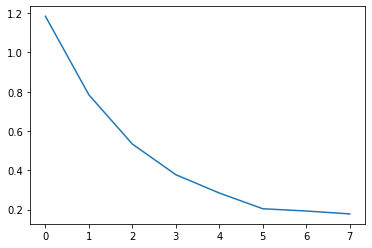

In [15]:
# Plot the loss
plt.plot(history.history['loss'])

### Testing our model

One last thing we need to do before we deploy a machine learning model is testing it on validation data. That is what we are going to do next.

In [16]:
# make a prediction helper function
classes = ["paper", "rock", "scissors"]
def predict(directory, classes):
    img = cv2.imread(directory)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA)
    img = img.reshape(1, 150, 150, 3)
    result = model.predict(img)
    print(classes[np.argmax(result[0])])

rock


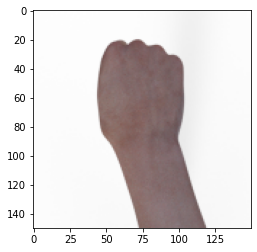

In [17]:
import random

VALIDATION_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation"

location = os.path.join(VALIDATION_DIR, random.choice(os.listdir(VALIDATION_DIR)))
img = cv2.imread(location)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA)
img = img.reshape(150, 150, 3)
plt.imshow(img)
predict(location, classes)

We can compute the loss and accuracy with the following code:

In [21]:
loss, acc = model.evaluate(test_generator)
print("Accuracy: {:.2f}%".format(round(acc, 2) * 100))
print("Loss: {:.2f}".format(round(loss, 2)))

12/12 [==============================] - 5s 364ms/step - loss: 0.0517 - accuracy: 0.9677
Accuracy: 97.00%
Loss: 0.05


paper


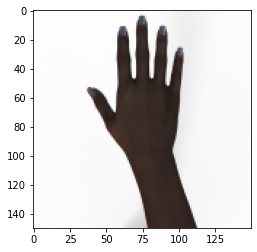

In [38]:
loaded_model = tf.keras.models.load_model('model.h5')
classes = ["paper", "rock", "scissors"]
location = os.path.join(VALIDATION_DIR, random.choice(os.listdir(VALIDATION_DIR)))

img = cv2.imread("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper-hires1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA)
img = img.reshape(1, 150, 150, 3)
pred = loaded_model.predict(img)
print(classes[np.argmax(pred[0])])
plt.imshow(img.reshape(150, 150, 3))